In [42]:
#%matplotlib
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

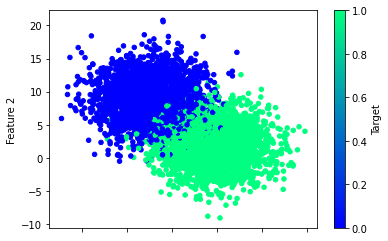

In [43]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [44]:
# Use sklearn to split dataset
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=72)

In [45]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()
# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [47]:
# Add our first Dense layer, including the input layer
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [48]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [49]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [51]:
# Fit the model to the training data
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 0s 899us/step - loss: 0.6696 - accuracy: 0.7213
Epoch 2/50
118/118 [==============================] - 0s 752us/step - loss: 0.6361 - accuracy: 0.8043
Epoch 3/50
118/118 [==============================] - 0s 748us/step - loss: 0.5865 - accuracy: 0.8536
Epoch 4/50
118/118 [==============================] - 0s 799us/step - loss: 0.5297 - accuracy: 0.8800
Epoch 5/50
118/118 [==============================] - 0s 767us/step - loss: 0.4752 - accuracy: 0.9003
Epoch 6/50
118/118 [==============================] - 0s 757us/step - loss: 0.4281 - accuracy: 0.9152
Epoch 7/50
118/118 [==============================] - 0s 804us/step - loss: 0.3886 - accuracy: 0.9245
Epoch 8/50
118/118 [==============================] - 0s 797us/step - loss: 0.3557 - accuracy: 0.9299
Epoch 9/50
118/118 [==============================] - 0s 762us/step - loss: 0.3283 - accuracy: 0.9349
Epoch 10/50
118/118 [==============================] - 0s 788us/step - loss: 0.305

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1368 - accuracy: 0.9432
Loss: 0.13681477308273315, Accuracy: 0.9431999921798706


<AxesSubplot:>

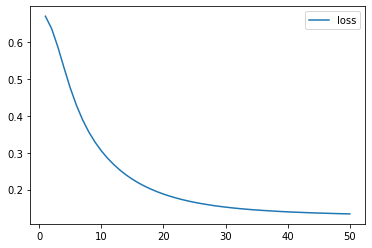

In [53]:
# Create a DataFrame containing training history
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
